# СБОРНЫЙ ПРОЕКТ

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd 

импорт библиотеки pandas

In [2]:
import numpy as np 

импорт библиотеки numpy

In [3]:
import matplotlib.pyplot as plot

импорт библиотеки matplotlib

In [4]:
 from scipy import stats

Импортируем метод stats из библиотеки scipy для распределения Стьюдента

In [5]:
import seaborn as sns

Чтобы нарисовать красивые графики и диаграммы используем пакет seaborn

Чтение таблицы games

In [6]:
games = pd.read_csv('/datasets/games.csv') 

Содержимое таблицы games

In [7]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сводная информация таблицы games

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Количество пропущенных значений

In [9]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


<h4><font color='green'>ВЫВОД по таблице Games</h4>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Таблица состоит из 11 колонок, разного типа данных, колонки Name, Year_of_Release, Critic_Score, User_Score, Rating — имеют пропущенные значения природу которых еще нужно установить.

### Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Переименование столбцов

Замена названия столбцов (приведите к нижнему регистру)

In [10]:
games.columns = map(str.lower, games.columns)

#### Привединие данных к нужным типам

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В связи с тем, что на "Шаг 3. Проведите исследовательский анализ данных", есть рекомендация: "Не учитывайте в работе данные за предыдущие годы.", предлагается удалить пропущенные значения в поле year_of_release

Удаление пропущенных значений в поле year_of_release

In [12]:
games.dropna(subset=['year_of_release'], inplace=True)

В процессе изучения общей информации было выявлено, что тип данных у поля games.year_of_release дробное число с плавающей точкой, а актуальный период это год, такая точность избыточна.

Приведение поля year_of_release к типу данных int

In [13]:
games.year_of_release = np.array(games.year_of_release, dtype='int')

#### Обработка пропусков

Так как мы не располагаем иноформацией о дате релиза той или иной игры,а заменять пропущенные значения 0 или средними значениями считаем нецелосообразным, так как такая информация или искажает данные или не несет полезной нагрузки при выявлении полей подпадающих под актуальный период, предположительно — игры вышедшие в 2016 году, поэтому пропущенные значения в поле year_of_release предлагается удалить

Удаление пропущенных значений в поле year_of_release

In [14]:
games.dropna(subset=['year_of_release'], inplace=True)

Имя в данном датасете является идентификатором игры, а потому игра без имени не идентифицируется, в связи с этим пропущенные значения в поле Name предлагается удалить

Удаление пропущенных значений в поле name

In [15]:
games.dropna(subset=['name'], inplace=True)

Всего в данной таблице в поле rating 8 категорий:
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»


Пропущенные значения в поле rating определим как TBD - to be determined - пока не определён

In [16]:
games.rating = games.rating.fillna('TBD')

Чтобы не удалять данные с пропущенными значениями заполнил их нулями, предположив, что пустое значение это отсутствие оценки


In [17]:
games.critic_score = games.critic_score.fillna(value=0)

То же самое сделаем и с содержимым поля user_score

In [18]:
games.user_score = games.user_score.fillna(value=0)

Поле user_score cодержит значение 'tbd'- to be determined - пока не определён. Так как нам предстоит производить корреляцию с полем critic_score заменим это значение  на нулевое

In [19]:
games.user_score = games.user_score.replace('tbd',0)

Приведем поле user_score к тому же типу данных, что и поле critic_score с целью дальнейшего анализа.

In [20]:
games.user_score = np.array(games.user_score, dtype='float')

Проверим всё ли в порядке.

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


ВЫВОД ПО ОБРАБОТКЕ ПРОПУСКОВ
В процессе обрабоки пропусков было проделана следующая работа:
* Удаление пропущенных значений в поле year_of_release
* Удаление пропущенных значений в поле name
* Заполнение пропущенных значений в полях:
    * critic_score
    * user_score
* Поле user_score cодержит значение 'tbd'- to be determined - пока не определён заменено на нулевое
* Поле user_score к тому же типу данных(float), что и поле critic_score с целью дальнейшего анализа

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

Объединим региональные продажи в одно поле — "sum_sales"

In [22]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,TBD,31.38


<h4><font color='green'>ВЫВОД по подготовке данных</h4>
    
В процессе подготовки данных были произведены следующие действия:
* Изменили названия столбцов (привели к нижнему регистру);
* Преобразовали данные в нужные типы. Поле year_of_release приведен к целочисленному значению, с целью дальнейго анализа
* Обработаны пропуски:
    * Поля year_of_release удалены в связи с тем, что на "Шаг 3. Проведите исследовательский анализ данных", есть рекомендация: "Не учитывайте в работе данные за предыдущие годы."
    * Поля name удалены, в связи с тем, что имя в данном датасете является идентификатором игры, а потому игра без имени не идентифицируется
    * Поля столбцов 'critic_score' 'user_score' заполняем  нулями, чтобы не терять данные
    * Эти же поля приводим к одному типу данных предварительно перезаписав ячейки содержащие 'tbd'  с целью дальнейшего анализа и установления зависимостей.
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'sum_sales'

После проделанной подготовки можно сказать, что таблица готова к исследовательскому анализу данных 

### Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.

* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Создадим сводную таблицу по количеству игр, которые вышли в разные годы.

In [24]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').head(10)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Количество игр выпущенных с 1980 по 2016 год

In [25]:
games.name.count()

16444

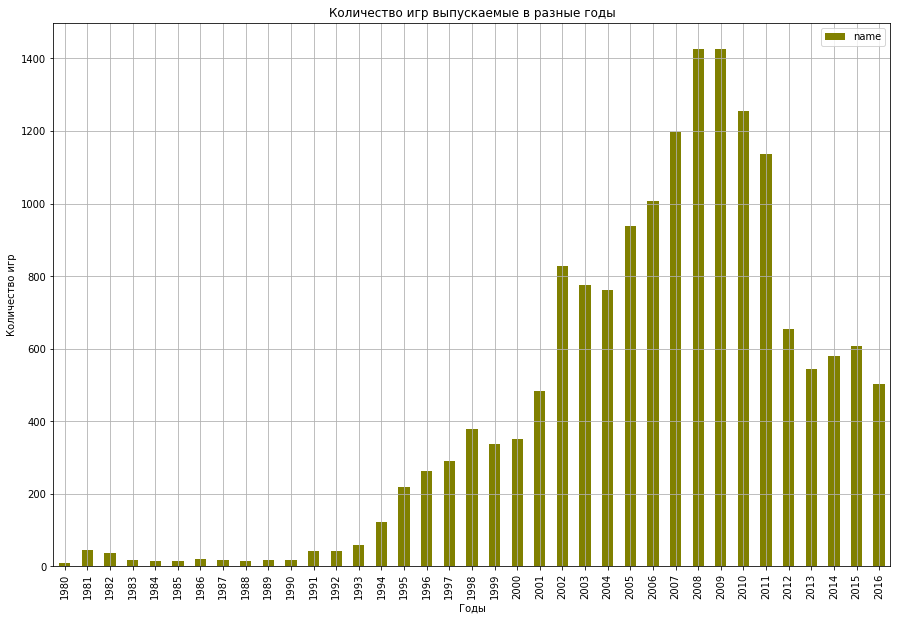

In [26]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind="bar"
                                              ,grid=True,figsize=(15,10),color='olive')
plot.title('Количество игр выпускаемые в разные годы');
plot.ylabel('Количество игр');
plot.xlabel('Годы');

<h4><font color='olive'>ВЫВОД по тому сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</h4>
    
Так как основная масса игр приходится на период начиная с 1995, то смотря на график можно сделать вывод, что за все периоды данные <b> не нужны</b>

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создадим сводную таблицу в которой отобразим платформы и суммарных доход

In [27]:
top_platform = games.groupby(['platform'])['sum_sales'].sum().to_frame().reset_index()

In [28]:
top_platform.sort_values('sum_sales',ascending=False).head(10)

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Выделим в отдельный датафрейм платформы с наибольшими суммарными продажами

Sony Playstation-2 (2000) — PS_2

In [29]:
ps_2 = games.loc[games.platform == 'PS2']

Microsoft XBox 360 (2005) — XBox_360

In [30]:
x_360 = games.loc[games.platform == 'X360']

Sony Playstation-3 (2006) — PS_3

In [31]:
ps_3 = games.loc[games.platform == 'PS3']

Nintendo Wii (2006) — Wii

In [32]:
wii = games.loc[games.platform == 'Wii']

Nintendo DS (2004) — DS

In [33]:
ds = games.loc[games.platform == 'DS']

Sony PlayStation (1994) — PS

In [34]:
ps = games.loc[games.platform == 'PS']

Sony Playstation-4 (2013) — PS_4

In [35]:
ps_4 = games.loc[games.platform == 'PS4']

Создадим таблицу ТОР-7 платформ с наибольшими доходами

In [36]:
top_7 = pd.concat([ps_2, x_360,ps_3,wii,ds,ps,ps_4])

Выведем сводную таблицу по самым прибыльным консолям

In [37]:
top_7.pivot_table(index='year_of_release',
                           columns='platform',
                           values='sum_sales',
                           aggfunc='sum',fill_value=0)

platform,DS,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,6.03,0.00,0.00,0.00,0.00,0.00
1995,0.00,35.96,0.00,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00,0.00


График нагляднее таблицы, посмотрим, что получилось

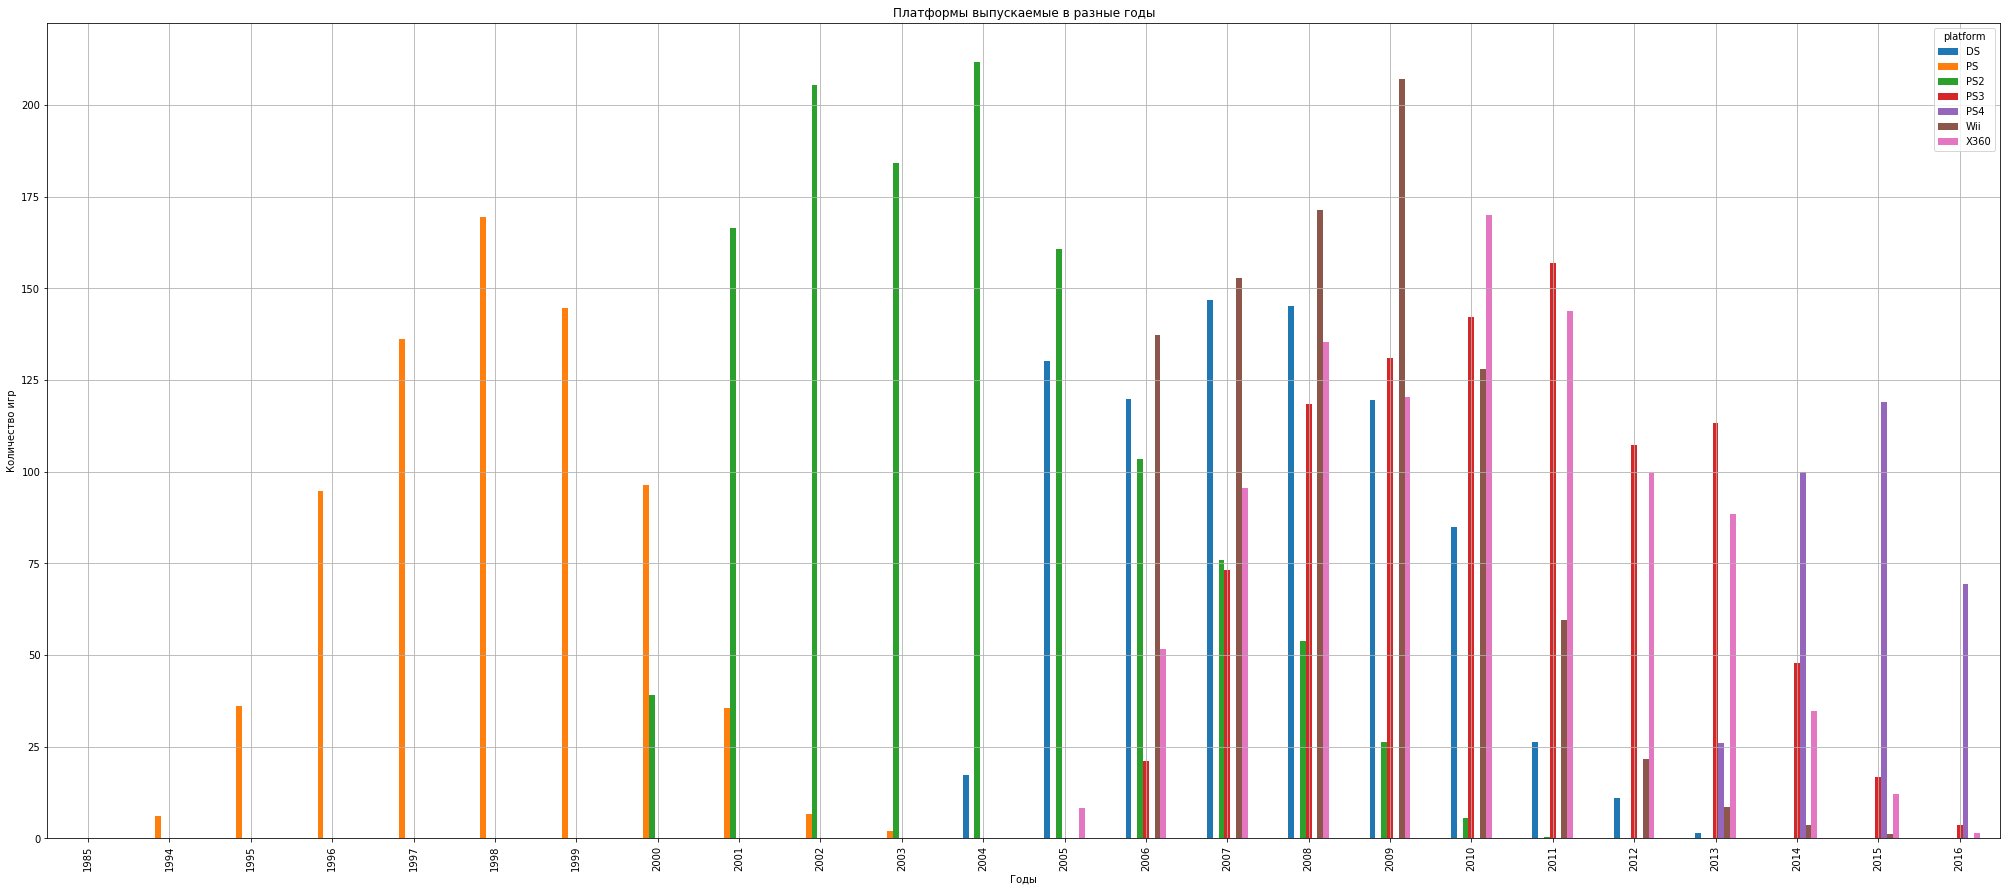

In [38]:
top_7.pivot_table(index='year_of_release',
                           columns='platform',
                           values='sum_sales',
                           aggfunc='sum').plot(kind="bar"
                                              ,grid=True,figsize=(35,15))
plot.title('Платформы выпускаемые в разные годы');
plot.ylabel('Количество игр');
plot.xlabel('Годы');

<h4><font color='olive'>ВЫВОД по тому "За какой характерный срок появляются новые и исчезают старые платформы?"</h4>
    
Даты выхода консолей 
 
* Sony PlayStation (1994) — PS
* Sony Playstation-2 (2000) — PS_2
* Nintendo DS (2004) — DS
* Microsoft XBox 360 (2005) — XBox_360
* Nintendo Wii (2006) — Wii
* Sony Playstation-3 (2006) — PS_3
* Sony Playstation-4 (2013) — PS_4

Характерный срок появления новых консолей 5-6 лет

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Срок появляение новых платформ 5 лет,но в с 2012 года наметился спад продаж и поэтому  за актульный период возьмем срок начиная с 2012 года и посмотрим сможем ли мы простоить прогноз на 2017 год

In [39]:
games.pivot_table(index='year_of_release', 
                  values='sum_sales', 
                  aggfunc='sum').sort_values('year_of_release', ascending=False).head()

,sum_sales
year_of_release,
2016,129.94
2015,267.98
2014,331.53
2013,361.24
2012,355.84


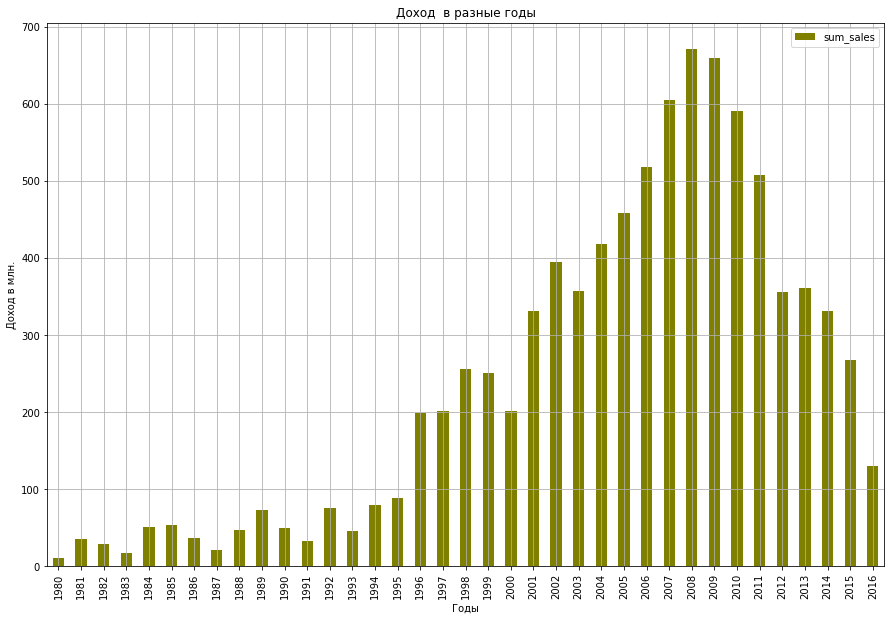

In [40]:
games.pivot_table(index='year_of_release', 
                  values='sum_sales', 
                  aggfunc='sum').plot(kind="bar"
                ,grid=True,figsize=(15,10),color='olive')
plot.title('Доход  в разные годы');
plot.ylabel('Доход в млн.');
plot.xlabel('Годы');

<h4><font color='olive'>ВЫВОД по выбору актуального для прогноза периода</h4>
    
Судя по графику сводной таблицы прогноз не утешительный, продажи за последние 5 лет упали в 2,75 раза    

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Выделим из таблицы games игры, которые вышли начиная с 2013 года, когда вышли последние платформы (PS4 и XBox One)

In [41]:
release_after = games[games.year_of_release > 2012]

Посмотрим на суммарный доход по консолям за последние несколько лет

In [42]:
release_after.pivot_table(index='platform',
                          values='sum_sales', 
                          aggfunc='sum', fill_value=0).sort_values('sum_sales',ascending=False)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


На графике можно увидеть тенденцию роста и падения продаж по годам и консолям

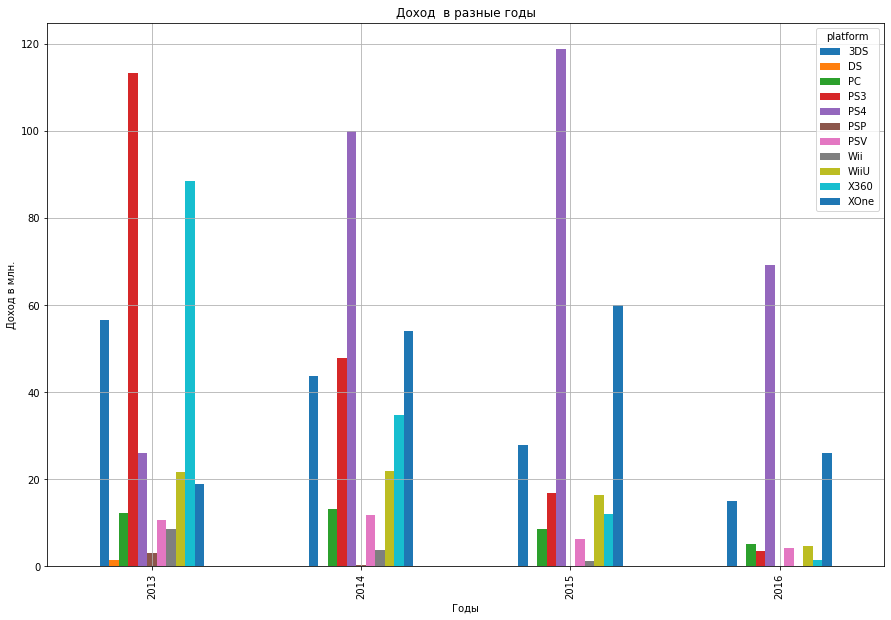

In [43]:
release_after.pivot_table(index='year_of_release',
                               columns='platform',values='sum_sales', 
                               aggfunc='sum', fill_value=0).plot(kind="bar"
                            ,grid=True,figsize=(15,10))
plot.title('Доход  в разные годы');
plot.ylabel('Доход в млн.');
plot.xlabel('Годы');

<h4><font color='olive'>ВЫВОД по выбору потенциально прибыльных платформ</h4>
    
Судя по графику сводной таблицы за 4 года можно выделить 3 лидеров:
* Sony Playstation-4 (2013) — PS_4
* Sony Playstation-3 (2006) — PS_3
* Xbox One (2013) — XOne

Если брать только 2016 год то лидеры немного изменились:
* Sony Playstation-4 (2013) — PS_4
* Xbox One (2013) — XOne
* Nintendo 3DS (2011) — 3DS

Но хоть они и лидеры доходы их год от года падают

#### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.


Так как нам придстоит строить прогнозы на 2017 год исходя из данных 2016, выделим эти данные в отдельную таблицу


In [44]:
release_2016 = games[games.year_of_release == 2016]

Построим сводную таблицу по доходам за 2016 год по каждой платформе

In [45]:
release_2016.pivot_table(index='platform',
                          values='sum_sales', 
                          aggfunc='sum', fill_value=0).sort_values('sum_sales', ascending=False)

,sum_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Количество игр вышедших в 2016 году на разных платформах

In [46]:
release_2016.name.nunique()

297

Количество платформ на которых выходили игры в 2016 году

In [47]:
release_2016.platform.nunique()

9

Выберем самые доходные игры за 2016 год и отобразим их в графике

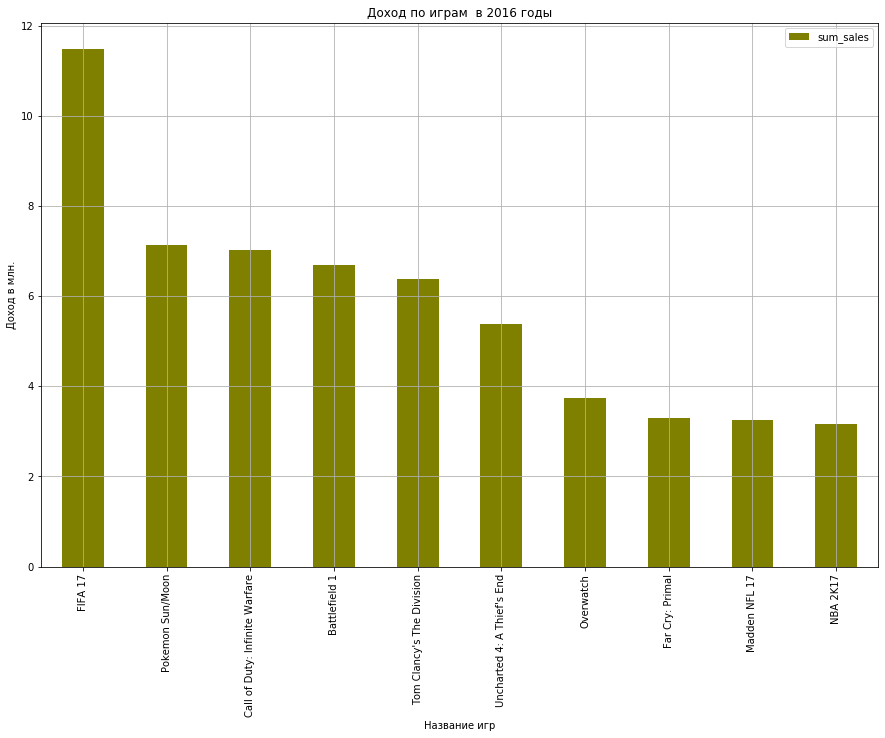

In [48]:
release_2016.pivot_table(index='name',
                          values='sum_sales', 
                          aggfunc='sum', fill_value=0).sort_values('sum_sales', ascending=False).head(10).plot(kind="bar"
                                              ,grid=True,figsize=(15,10),color='olive')
plot.title('Доход по играм  в 2016 годы');
plot.ylabel('Доход в млн.');
plot.xlabel('Название игр');

Посмотрим как у самой прибыльной игры 2016 года <b>"FIFA 17"</b> распределяется прибыль по консолям

In [49]:
fifa_17 = release_2016.loc[games.name == 'FIFA 17']

Суммарный доход за 2016 год игры FIFA 17

In [50]:
fifa_17.sum_sales.sum()

11.48

<b>Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

Начнем с <b> FIFA 17

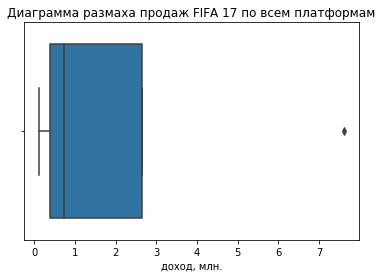

In [51]:
plot.title("Диаграмма размаха продаж FIFA 17 по всем платформам")  # Дополним график заголовком
ax=sns.boxplot(fifa_17.sum_sales) 
ax.set(xlabel='доход, млн.')  # добавим подпись к оси абсцисс
plot.show()

Посмотрим на общую статистическую информацию по игре FIFA 17

In [52]:
fifa_17.sum_sales.describe()

count    5.000000
mean     2.296000
std      3.127144
min      0.120000
25%      0.380000
50%      0.730000
75%      2.650000
max      7.600000
Name: sum_sales, dtype: float64

Диаграмма более наглядно показывает доход по консолям за 2016 год по игре FIFA 17

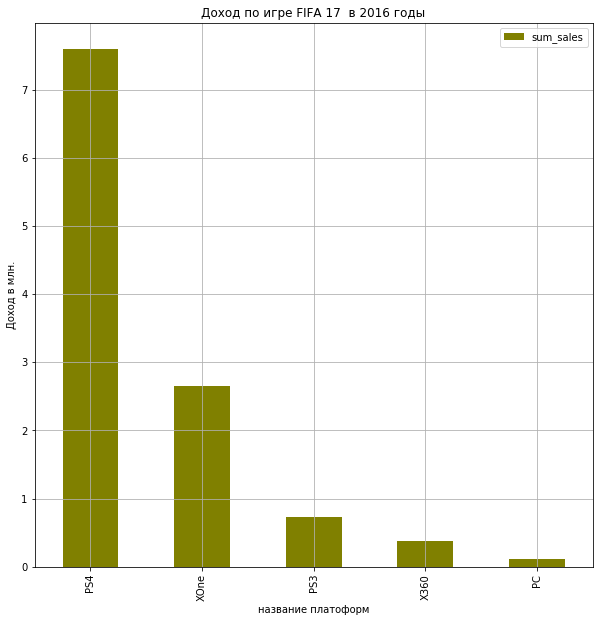

In [53]:
fifa_17.pivot_table(index='platform',
                    values='sum_sales',
                    aggfunc='sum').sort_values('sum_sales', 
                                               ascending=False).head(10).plot(kind="bar"
                                              ,grid=True,figsize=(10,10),color='olive')
plot.title('Доход по игре FIFA 17  в 2016 годы');
plot.ylabel('Доход в млн.');
plot.xlabel('название платоформ');

Из-за того, что доход от консоли PS4 больше, чем в два раза превысил доход с остальных платформ, имеет место быть выброс,который влияет на среднее значение (2,29 млн.)

A теперь по игре <b>"Pokemon Sun/Moon"

Выведем игры Pokemon Sun/Moon в отдельную таблицу

In [54]:
pokemon = release_2016.loc[games.name == 'Pokemon Sun/Moon']

In [55]:
pokemon

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,TBD,7.14


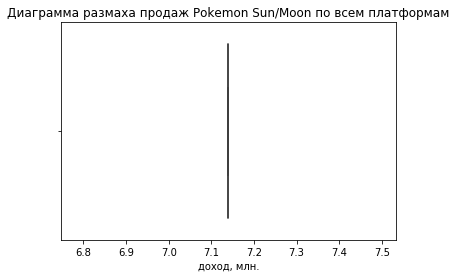

In [56]:
plot.title("Диаграмма размаха продаж Pokemon Sun/Moon по всем платформам")  # Дополним график заголовком
ax=sns.boxplot(pokemon.sum_sales) 
ax.set(xlabel='доход, млн.')  # добавим подпись к оси абсцисс
plot.show()

In [57]:
pokemon.sum_sales.describe()

count    1.00
mean     7.14
std       NaN
min      7.14
25%      7.14
50%      7.14
75%      7.14
max      7.14
Name: sum_sales, dtype: float64

Так как доход игры Pokemon Sun/Moon был только с одной консоли (3DS),это связано  с тем, что игра разработанная компанией Game Freak и выпущенные Nintendo для портативной игровой системы Nintendo 3DS в 2016 году,поэтому боксплот не дает существенной информации

<b>Uncharted 4: A Thief's End

Выведем игры Uncharted 4: A Thief's End в отдельную таблицу

In [58]:
uncharted = release_2016.loc[games.name == "Uncharted 4: A Thief's End"]

In [59]:
uncharted

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.5,0.19,0.85,93.0,7.9,T,5.39


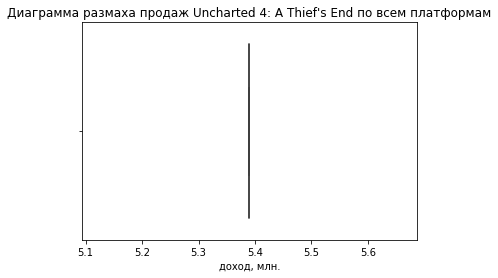

In [60]:
plot.title("Диаграмма размаха продаж Uncharted 4: A Thief's End по всем платформам")  # Дополним график заголовком
ax=sns.boxplot(uncharted.sum_sales) 
ax.set(xlabel='доход, млн.')  # добавим подпись к оси абсцисс
plot.show()

In [61]:
uncharted.sum_sales.describe()

count    1.00
mean     5.39
std       NaN
min      5.39
25%      5.39
50%      5.39
75%      5.39
max      5.39
Name: sum_sales, dtype: float64

Такая же история,как и с игрой "Pokemon Sun/Moon" мы видим и с Uncharted 4: A Thief's End, продажи были только с одной платформы (PS4),игра разработанная студией Naughty Dog и изданная Sony Interactive Entertainment эксклюзивно для игровой консоли Sony PlayStation 4

<b>Call of Duty: Infinite Warfare

Выведем игры Call of Duty: Infinite Warfare в отдельную таблицу

In [62]:
call_of_duty = release_2016.loc[games.name == "Call of Duty: Infinite Warfare"]

In [63]:
call_of_duty

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
9292,Call of Duty: Infinite Warfare,PC,2016,Shooter,0.04,0.08,0.00,0.01,73.0,3.0,M,0.13


In [64]:
call_of_duty.sum_sales.sum()

7.0200000000000005

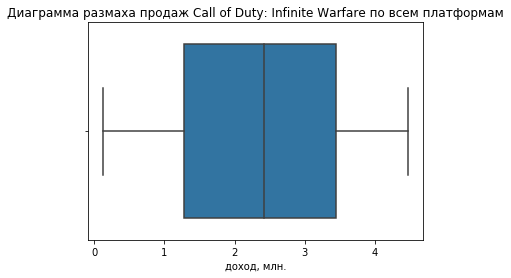

In [65]:
plot.title("Диаграмма размаха продаж Call of Duty: Infinite Warfare по всем платформам")  # Дополним график заголовком
ax=sns.boxplot(call_of_duty.sum_sales) 
ax.set(xlabel='доход, млн.')  # добавим подпись к оси абсцисс
plot.show()

In [66]:
call_of_duty.sum_sales.describe()

count    3.000000
mean     2.340000
std      2.171106
min      0.130000
25%      1.275000
50%      2.420000
75%      3.445000
max      4.470000
Name: sum_sales, dtype: float64

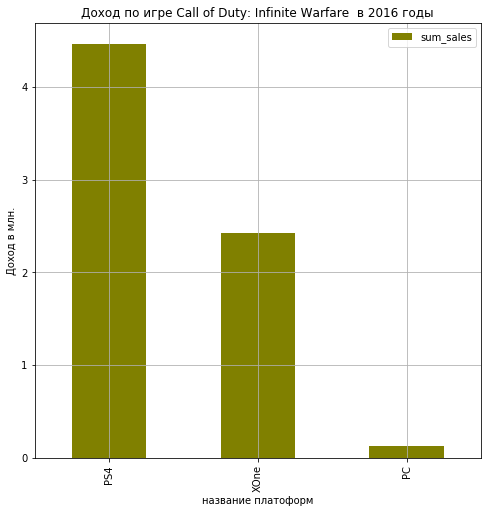

In [67]:
call_of_duty.pivot_table(index='platform',values='sum_sales',aggfunc='sum').sort_values('sum_sales', ascending=False).head(10).plot(kind="bar"
                                              ,grid=True,figsize=(8,8),color='olive')
plot.title('Доход по игре Call of Duty: Infinite Warfare  в 2016 годы');
plot.ylabel('Доход в млн.');
plot.xlabel('название платоформ');

Средний доход от игры "Call of Duty: Infinite Warfare" составил 2.34 млн.на консоли Xbox One, максимальный 4.47 млн.на консоли PS4

<b> Battlefield 1

Выведем игры Battlefield 1 в отдельную таблицу

In [68]:
battlefield = release_2016.loc[games.name == "Battlefield 1"]

In [69]:
battlefield

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25
5000,Battlefield 1,PC,2016,Shooter,0.11,0.24,0.00,0.03,88.0,7.6,M,0.38


In [70]:
battlefield.sum_sales.sum()

6.7

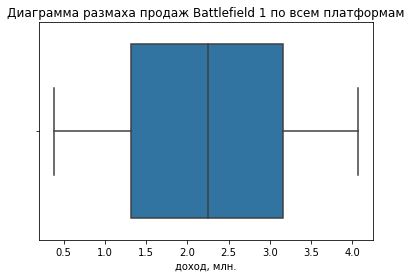

In [71]:
plot.title("Диаграмма размаха продаж Battlefield 1 по всем платформам")  # Дополним график заголовком
ax=sns.boxplot(battlefield.sum_sales) 
ax.set(xlabel='доход, млн.')  # добавим подпись к оси абсцисс
plot.show()

In [72]:
battlefield.sum_sales.describe()

count    3.000000
mean     2.233333
std      1.845056
min      0.380000
25%      1.315000
50%      2.250000
75%      3.160000
max      4.070000
Name: sum_sales, dtype: float64

Примерно та же история, что и с "Call of Duty: Infinite Warfare" по ряду средних показателей, мы видим и с игрой "Battlefield 1", среднее значение 2,23 млн. на консоле Xbox One, max значение 4,07 млн. доход от платформы PS4

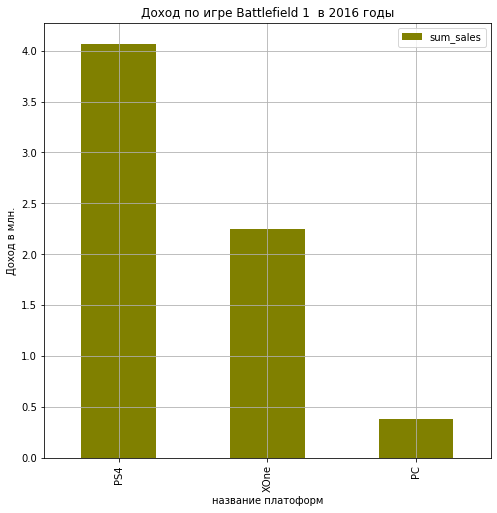

In [73]:
battlefield.pivot_table(index='platform',
                        values='sum_sales',
                        aggfunc='sum').sort_values('sum_sales', 
                                                   ascending=False).head(10).plot(kind="bar"
                                              ,grid=True,figsize=(8,8),color='olive')
plot.title('Доход по игре Battlefield 1  в 2016 годы');
plot.ylabel('Доход в млн.');
plot.xlabel('название платоформ');

<h4><font color='olive'>ВЫВОД по тому: Велика ли разница в продажах? А в средних продажах на разных платформах?</h4>
    
Лидерами продаж 2016 года стали:
* FIFA 17  — 11,48 млн.
* Pokemon Sun/Moon — 7,14 млн.
* Call of Duty: Infinite Warfare — 7,02 млн.
* Battlefield 1 — 6,70 млн.
* Uncharted 4: A Thief's — End 5,39 млн.

Как видно разница есть, особенно между первым и вторым лидером.

Разница в продажах по платформах тоже видна невооруженным взгядом, лидер:

* Sony Playstation-4 (2013) — PS_4 — 21,53 млн.
* Xbox One (2013) — XOne —  7,32 млн.
* Nintendo 3DS (2011) — 3DS — 5,39 млн.

Что касается средних показателей представленных графиком boxplot мы видим три истории:
* Абсолютный лидер FIFA 17 с выбросом из-за того, что доход от консоли PS4 более, чем в два раза превысил доход с остальных платформ, имеет место быть выброс,который влияет на среднее значение (2,29 млн.)
* Pokemon Sun/Moon и Uncharted 4: A Thief's выпущенные эксклюзивно на одной консоле(Pokemon Sun/Moon на PS4 и Uncharted 4: A Thief's на Nintendo 3DS
* Call of Duty: Infinite Warfare и Battlefield 1 имеющие близкие средние значения и лидерство продаж за PS4

По предварительным прогнозам платформа Sony Playstation-4 (2013) — PS_4 лидер продаж 2016 года

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Как мы смогли выяснить самой популярной платформой в  2016 году оказалась Sony Playstation-4 (2013) — PS_4

Выведем в отдельную таблицу игры на Sony Playstation-4

In [74]:
ps_4 = release_2016.loc[games.platform =='PS4']

Постоим диаграмму рассеивания между отзывами критиков и продажами игр на Sony Playstation-4

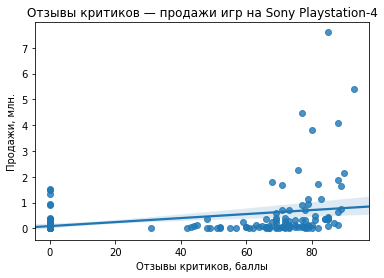

In [75]:
sns.regplot(x='critic_score', y='sum_sales', data=ps_4)
# подпишем оси координат
plot.title("Oтзывы критиков — продажи игр на Sony Playstation-4")
plot.xlabel("Отзывы критиков, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

используем метод corr() для установления зависимости между отзывами критиков и продажами игр на Sony Playstation-4

In [76]:
ps_4.critic_score.corr(ps_4.sum_sales) 

0.29245128376986657

Постоим диаграмму рассеивания между отзывами пользователями и продажами

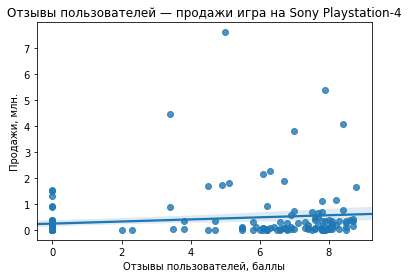

In [77]:
sns.regplot(x='user_score', y='sum_sales', data=ps_4)
# подпишем оси координат
plot.title("Oтзывы пользователей — продажи игра на Sony Playstation-4")
plot.xlabel("Отзывы пользователей, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

Построим корреляцию между отзывами пользователей и продажами игр на Sony Playstation-4

In [78]:
ps_4.user_score.corr(ps_4.sum_sales) 

0.1470902183240417

<h4><font color='olive'>ВЫВОД по теме:"Посчитайте корреляцию между отзывами и продажами"</h4>
    
Судя по графикам и расчетам коэффициента корреляции, который составляет 0,29 между отзывами критиков и продажам, и 0,14 между отзывами пользователей и продажами, корреляция слабая, возможно связь нелинейная.

#### Соотнесите выводы с продажами игр на других платформах.


Следующие к тройке лидеров у нас:
* Xbox One (2013) — XOne —  7,32 млн.
* Nintendo 3DS (2011) — 3DS — 5,39 млн.

Выведем в отдельную таблицу игры на Xbox One

In [79]:
xbox = release_2016.loc[games.platform =='XOne']

Постоим диаграмму рассеивания между отзывами критиков и продажами игр на Xbox One

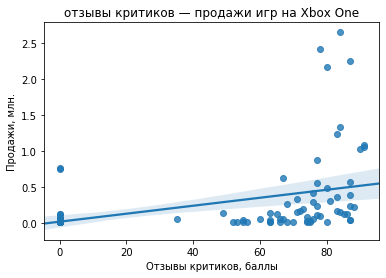

In [80]:
sns.regplot(x='critic_score', y='sum_sales', data=xbox)
# подпишем оси координат
plot.title("отзывы критиков — продажи игр на Xbox One")
plot.xlabel("Отзывы критиков, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

Посчитаем корреляцию между отзывами критиков и продажами игр на Xbox One

In [81]:
xbox.critic_score.corr(xbox.sum_sales) 

0.3610023437154511

Построим диаграмму рассеивания между отзывами пользователей и продажами игр на Xbox One

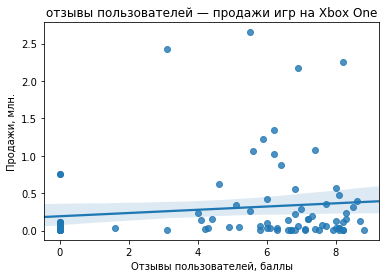

In [82]:
sns.regplot(x='user_score', y='sum_sales', data=xbox)
# подпишем оси координат
plot.title("отзывы пользователей — продажи игр на Xbox One")
plot.xlabel("Отзывы пользователей, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

Посчитаем корреляцию между отзывами пользователей и прожадами игр на Xbox One

In [83]:
xbox.user_score.corr(xbox.sum_sales) 

0.1238737202539311

Те же действия произведем над Nintendo 3DS, платформой, которая завешает тройку лидеров продаж игр на приставках

Выведем в отдельную таблицу игры на Nintendo 3DS

In [84]:
three_ds = release_2016.loc[games.platform =='3DS']

Построим диаграмму рассеивания между отзывами критиков и продажами игр на Nintendo 3DS

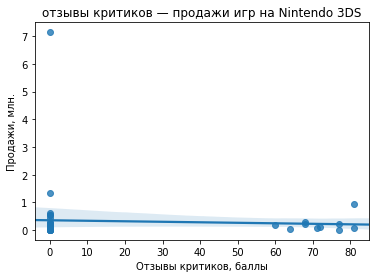

In [85]:
sns.regplot(x='critic_score', y='sum_sales', data=three_ds)
# подпишем оси координат
plot.title("отзывы критиков — продажи игр на Nintendo 3DS")
plot.xlabel("Отзывы критиков, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

Посчитаем коэффициент корреляции между отзывами критиков и продажами игр на Nintendo 3DS

In [86]:
three_ds.critic_score.corr(three_ds.sum_sales) 

-0.05212526485486615

Построим диаграмму рассеивания между отзывами пользователями и продажами игр на Nintendo 3DS

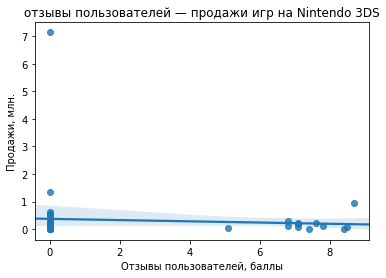

In [87]:
sns.regplot(x='user_score', y='sum_sales', data=three_ds)
# подпишем оси координат
plot.title("отзывы пользователей — продажи игр на Nintendo 3DS")
plot.xlabel("Отзывы пользователей, баллы");
plot.ylabel("Продажи, млн.");
plot.show(); # построим диаграмму рассеивания

Посчитаем коэффициент корреляции между отзывами пользователей и продажами игр на Nintendo 3DS

In [88]:
three_ds.user_score.corr(three_ds.sum_sales) 

-0.06995038894601222

<h4><font color='olive'>ВЫВОД по теме:"Продажы игр на других платформах"</h4>
    
Судя по графикам и расчетам коэффициента корреляции, который составляет:
* Xbox One отзывы критиков 0,36 / отзывы пользователей 0,12
* Nintendo 3DS отзывы критиков -0,05 / отзывы пользователей -0,06

Можно сделать вывод: корреляция слабая, возможно связь нелинейная.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Теперь обратим внимание на жанры игры продаваемые в 2016 году

Посчитаем общее количество жанров игр 2016 года

In [89]:
release_2016.genre.nunique()

12

Посмотрим, какие самые прибыльные жанры игр в 2016 году

In [90]:
release_2016.pivot_table(index='genre',
                         values='sum_sales',
                         aggfunc='sum',fill_value=0).sort_values('sum_sales',ascending=False)

,sum_sales
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


Посчитаем общий доход по жанрам за 2016 год

In [91]:
release_2016.sum_sales.sum()

129.94

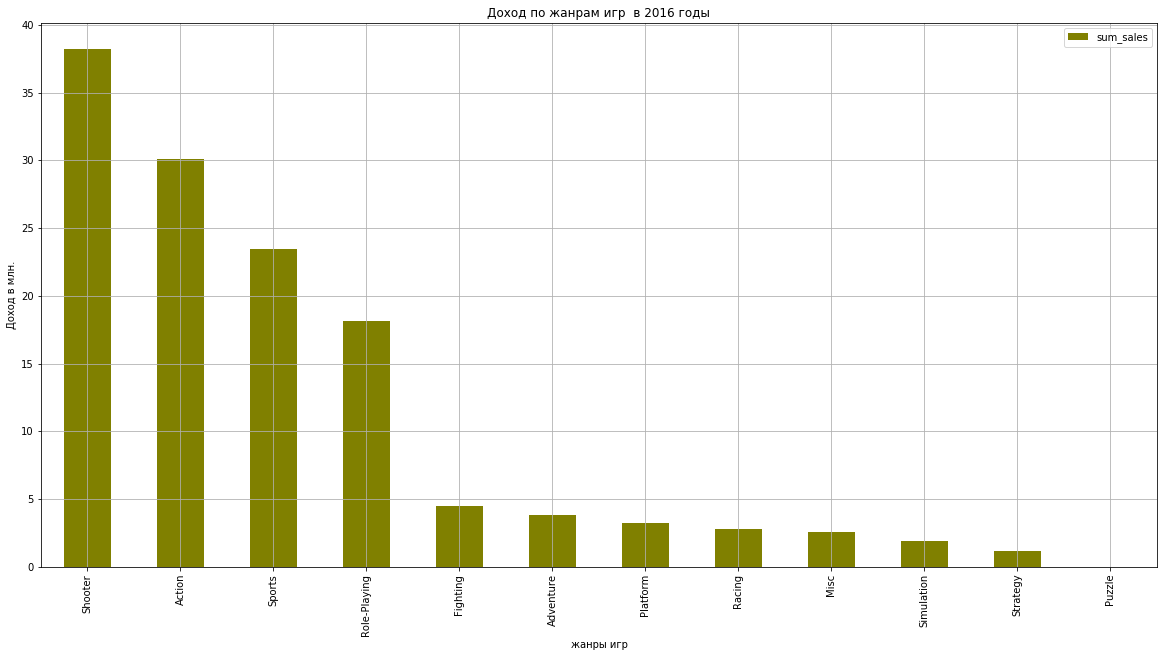

In [92]:
release_2016.pivot_table(index='genre',
                         values='sum_sales',
                         aggfunc='sum',fill_value=0).sort_values('sum_sales',ascending=False).plot(kind="bar"
                                              ,grid=True,figsize=(20,10),color='olive')
plot.title('Доход по жанрам игр  в 2016 годы');
plot.ylabel('Доход в млн.');
plot.xlabel('жанры игр');

<h4><font color='olive'>ВЫВОД по теме:"Общее распределение игр по жанрам"</h4>
    
Судя по графику и сводной таблице распределение игр по жанрам, можно выделить 4 лидеров:
* Shooter(англ.«стрелок») —	38.22 млн.
* Action (англ. «действие») —	30.11 млн.
* Sports(англ. «виды спорта») —	23.49 млн.
* Role-Playing(англ.«ролевая игра») — 18.18 млн.

Есть и откровенные аутсайдеры: 
* Strategy(англ.«стратегия») — 1.13 млн.
* Puzzle(англ.«пазлы/логические игры») —	0.01 млн.

Доход от лидеров продаж (Shooter(англ.«стрелок»), Action, Sports, Role-Playing) составляет 110 млн., а это 84,61% от общего дохода продаж по всем жанрам

Из этого можно сделать вывод, что жанры с высокими продажами сильно выделяются на фоне жанров с низкими продажами

<h4><font color='green'>ВЫВОД по исследовательскому анализу данных</h4>
    
За период с 1980 по 2016 год было выпущено более 16 тыс. игр.

Резкий подъем начался с 1995 года.

В среднем новые платформы появлялись раз 3-5 лет, а исчезали 7-9 лет.

В качестве актуального периода был выбран 2016 год, на основе данных актуального периода будет строиться прогноз на 2017 год.

Самые прибыльные платформы за 2016 год:
* Sony Playstation-4 (2013) — PS_4 — 21,53 млн.
* Xbox One (2013) — XOne —  7,32 млн.
* Nintendo 3DS (2011) — 3DS — 5,39 млн.

По всем лидерам продаж корреляция между отзывами и продажами слабая, возможно связь нелинейная.

Самые прибыльные игры за 2016 год:
* FIFA 17  — 11,48 млн.
* Pokemon Sun/Moon — 7,14 млн.
* Call of Duty: Infinite Warfare — 7,02 млн.
* Battlefield 1 — 6,70 млн.
* Uncharted 4: A Thief's — End 5,39 млн.

Самый популярные жанры за 2016 год:
* Shooter(англ.«стрелок») —	38.22 млн.
* Action (англ. «действие») —	30.11 млн.
* Sports (англ. «виды спорта») —	23.49 млн.
* Role-Playing(англ.«ролевая игра») — 18.18 млн.

<b>
Из всего выше сказанного можно сделать вывод, что перспективной платформой, несмотря на общий спад рынка игровых платформ, может стать Sony Playstation-4, если конечно не выйдет новая консоль.
Перспективный жанр — Shooter в стиле Call of Duty: Infinite Warfare и Battlefield 1
    

### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

По рекомендации наставника,в качестве актуального периода возьмем не 2016 года, как раньше предполагалось (так как такие не продолжительные данные могут быть не очень показательны), а начиная с 2014 года

Построим сводную таблицу, чтобы получить <b> топ-5 популярных платформ по продажам в каждом регионе (Северной Америке, Японии, Европе)

Общий доход по регионам: <b> Европа </b> (в млн.)

In [93]:
release_2014 = games[games.year_of_release >= 2014]

In [94]:
release_2014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,TBD,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,TBD,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,TBD,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01


Суммарный доход <b>Европы</b> (в млн.) 2014-2016 годы

In [95]:
release_2014.eu_sales.sum()

270.67999999999995

Общий доход по регионам: <b> Северная Америка </b> (в млн.)

In [96]:
release_2014.na_sales.sum()

284.06000000000006

Общий доход по регионам: <b> Япония </b> (в млн.)

In [97]:
release_2014.jp_sales.sum()

93.09

Общий доход по остальным регионам 

In [98]:
release_2014.other_sales.sum()

81.62

Построим сводную таблицу, в которой отобразим продажи на разных платформах в разных регионах.Хоть у нас и не стоит задача посмотреть на ситуацию в остальных регионах, для сравнения с другими регионами добавим колонку с этими данными, чтобы увидеть общую тенденцию на рынке


In [99]:
release_2014.pivot_table(index='platform',
                         values=['na_sales','jp_sales','eu_sales','other_sales'],
                         aggfunc='sum').sort_values('na_sales',ascending=False).head()

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,130.04,15.02,98.61,44.48
XOne,46.25,0.32,81.27,12.52
X360,15.49,0.08,28.30,4.35
3DS,16.12,44.24,22.64,3.68
PS3,25.54,11.22,22.05,9.37


Выведем диаграмму для наглядности.

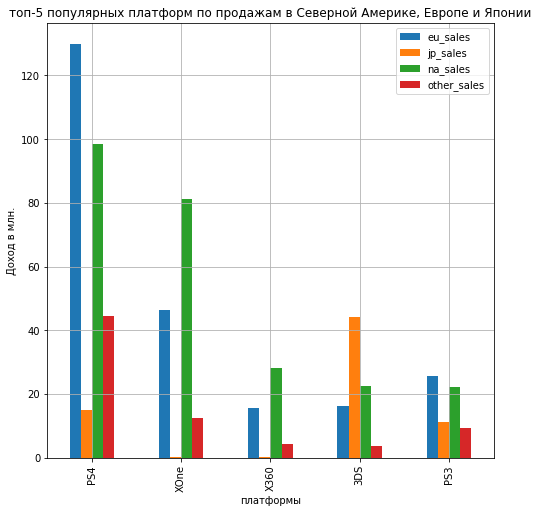

In [100]:
release_2014.pivot_table(index='platform',
                  values=['na_sales','jp_sales','eu_sales','other_sales'],
                  aggfunc='sum').sort_values('na_sales',ascending=False).head().plot(kind="bar"
                                              ,grid=True,figsize=(8,8))
plot.title('топ-5 популярных платформ по продажам в Северной Америке, Европе и Японии');
plot.ylabel('Доход в млн.');
plot.xlabel('платформы');

Построим сводную таблицу, чтобы получить <b> топ-5 популярных жанров по продажам в Северной Америке, Японии, Европе

In [101]:
release_2014.pivot_table(index='genre',
                         values=['na_sales','jp_sales','eu_sales','other_sales'],
                         aggfunc='sum').sort_values('na_sales',ascending=False).head()

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Shooter,65.52,4.87,79.02,21.53
Action,74.68,29.58,72.53,22.57
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Misc,12.86,5.61,15.05,4.03


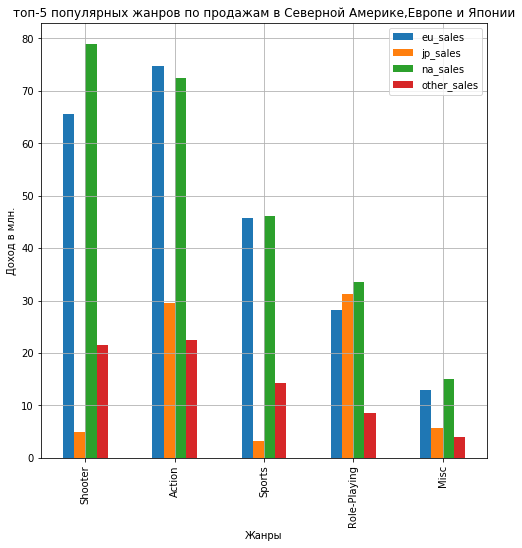

In [102]:
release_2014.pivot_table(index='genre',
                         values=['na_sales','jp_sales','eu_sales','other_sales'],
                         aggfunc='sum').sort_values('na_sales',ascending=False).head().plot(kind="bar"
                                              ,grid=True,figsize=(8,8))
plot.title('топ-5 популярных жанров по продажам в Северной Америке,Европе и Японии');
plot.ylabel('Доход в млн.');
plot.xlabel('Жанры');

<b> Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Построим сводную ведомость, в которой отобразим рейтинг ESRB по регионам

In [103]:
release_2014.pivot_table(index='rating',
                  values=['na_sales','jp_sales','eu_sales','other_sales'],
                  aggfunc='sum').sort_values('na_sales',ascending=False).head()
                                              

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,93.44,8.01,96.42,28.67
TBD,58.95,56.90,64.72,18.40
E,58.06,8.94,50.74,15.39
T,34.07,14.78,38.95,11.33
E10+,26.16,4.46,33.23,7.83


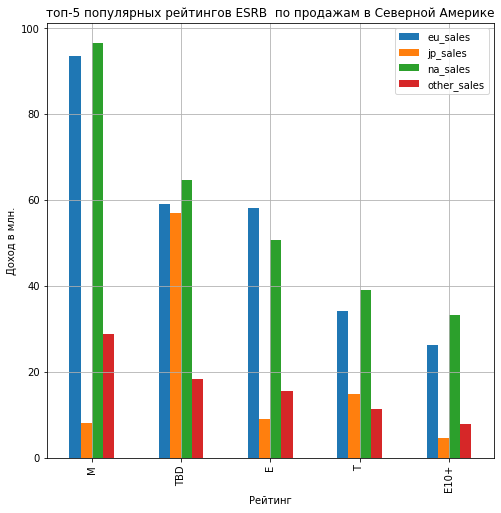

In [104]:
release_2014.pivot_table(index='rating',values=['na_sales','jp_sales','eu_sales','other_sales'],aggfunc='sum').sort_values('na_sales',ascending=False).head().plot(kind="bar"
                                              ,grid=True,figsize=(8,8))
plot.title('топ-5 популярных рейтингов ESRB  по продажам в Северной Америке');
plot.ylabel('Доход в млн.');
plot.xlabel('Рейтинг');

<h4><font color='green'>ВЫВОД по состалению портрета пользователя каждого региона</h4>
    
Пользователь за актуальный период (2014-2016) в <b>Европе</b> выглядит так:
* Большой поклонник Sony Playstation-4 — PS4 
* Любитель игр в жанре Shooter (англ.«стрелок»),Sports (англ. «виды спорта»), Action (англ. «действие»)
* Отдающий предпочтение играм в категории:
    * М — для взрослых
    * Е — для всех
    * Т — для подростков
    
Скорее всего это либо взрослый (совершеннолетний) или подросток  

Пользователь за актуальный период (2014-2016) в <b>Северной Америке</b>,чем-то схож с игроком из Европы и выглядит так:
* Большой поклонник Sony Playstation-4 — PS4, но и не забывает про  Xbox One
* Игры в жанре — Shooter (англ.«стрелок») любит больше чем его заокеанский брат,но играм в жанре — Sport (англ. «виды спорта»), больше предподчитает — Action (англ. «действие»),плюс иногда хочет почувствовать себя в роли мифического героя играя в Role-Playing (англ. «ролевая игра») игры
* Категории почти теже разве,что баланс перевешивает в сторону игр для взрослых:
    * М — для взрослых
    * Е — для всех
    * Т — для подростков
    
Из чего можно предположить, что взрослых игроков в Северной Америке не меньше, чем подростков

Портрет игрока из <b>Японии</b> несколько отличается от своих собратьев:
* Платформу предпочитает больше Nintendo 3DS, чем Sony Playstation-4
* Жанру  Action (англ. «действие») предпочитает Role-Playing (англ. «ролевая игра») игры
* Несмотря на большое количество игр без рейтинга, игры для подростков доминируют над играми для взрослых

Хоть и игроков из страны восходящего солнца в два с лишнем раза меньше, чем в Европе и Северной Америке можно предположить, что подростки активнее играют, чем взрослые

В остальных регионах портрет мало чем отличается от Европы и Северной Америки.
* Любимая консоль — Sony Playstation-4
* Любимый жанр — Shooter (англ.«стрелок»),Sports (англ. «виды спорта»), Action (англ. «действие»)
* Рейтинг ESRB  доминирует М  — для взрослых

Отвечая на вопрос: "Влияет ли рейтинг ESRB на продажи в отдельном регионе?", можно смело ответить: Да, влияет и позволяет выдвигать гипотезы относительно возроста игрока, но судить только по рейтингу о возрастной группе играков, не самый лучший критерий для более четкой категоризации по возрастам нужны дополнительные исследования. 

### Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Начнём с формулировки нулевой гипотезы H₀.<br>
<b>"Средние пользовательские рейтинги платформ Xbox One и PC равны"</b><br>
 H₀ всегда формулируется так, чтобы использовать знак равенства
 Исходя из H₀ формулируется альтернативная гипотеза H₁.<br>
<b>"Средние пользовательские рейтинги платформ Xbox One и PC не равны"</b>

Пороговое значение alpha или уровень значимости определим в 5% так как это общепринятое пороговое значение.

Для проверки гипотезы будем использовать <b> параметрический критерий</b> – которые служат для проверки гипотез о параметрах распределений (чаще всего нормального). Такими критериями являются: t-критерий Стьюдента для независимых выборок используя метод scipy.stats.ttest_1samp (array, popmean)

Так как метод scipy.stats.ttest_1samp (array, popmean) работает с Series, то выведем колонку пользовательские рейтинги в отдельные переменые — user_score_PC и user_score_xbox

In [105]:
user_score_PC = release_2014.user_score[release_2014.platform == 'PC']

In [108]:
user_score_PC

458      3.9
1530     5.4
1677     0.0
1730     7.9
2303     5.7
        ... 
16509    7.9
16518    1.4
16617    0.0
16631    0.0
16692    7.6
Name: user_score, Length: 151, dtype: float64

Посмотрим на график boxplot и общую статистическую информацию по колонке.

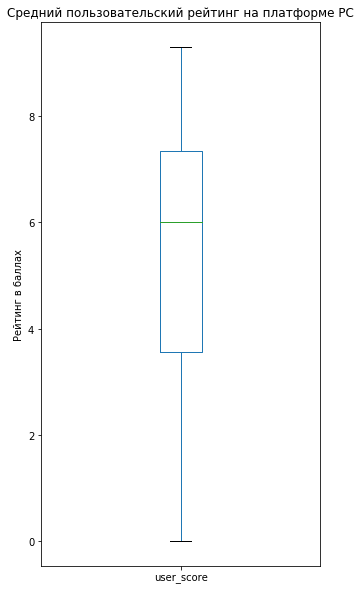

In [109]:
user_score_PC.plot.box(figsize=(5,10))
plot.title('Cредний пользовательский рейтинг на платформе РС')
plot.ylabel('Рейтинг в баллах')
plot.show()

Общая статистическая информация

In [ ]:
user_score_PC.describe()

Те же действия произведем и с пользовательским рейтингом на платформе Xbox One: выведем в отдельную переменую, нарисуем график boxplot и просмотрим, что нам покажет метод describe()

In [ ]:
user_score_xbox = release_2014.user_score[release_2014.platform == 'XOne']

In [ ]:
user_score_xbox.plot.box(figsize=(5,10))
plot.title('Cредний пользовательский рейтинг на платформе РС')
plot.ylabel('Рейтинг в баллах')
plot.show()

In [ ]:
user_score_xbox.describe()

alpha - критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

In [ ]:
alpha = .05 

расчет  t-критерий Стьюдента

In [ ]:
results = stats.ttest_ind(user_score_PC,user_score_xbox)

In [ ]:
results.pvalue

In [ ]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

ВЫВОД
___
 t-критерий Стьюдента не получилось отвергнуть нулевую гипотезу, подтверждение этому можно увидеть из общей информации по тарифам и на графике boxplot:<br>
 <b>"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"</b>

Проверяем следующую гипотезу:"Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные."

Начнём с формулировки нулевой гипотезы H₀.<br>
<b>"Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны"</b><br>
 H₀ всегда формулируется так, чтобы использовать знак равенства
 Исходя из H₀ формулируется альтернативная гипотеза H₁.<br>
<b>"Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные"</b>

Порядок действий будет сходим как и при проверки предыдущей гипотезы:
* Выведем в отдельные переменные колонки пользовательских рейтингов жанра  Action (англ. «действие») и  Sports (англ. «виды спорта»)
* Постоим на этих данных график boxplot 
* Выведем общую статистическую информацию по колонке
* Произведем расчет t-критерий Стьюдента

Пользовательский рейтинг игр в жанре Action (англ. «действие»)

In [ ]:
user_score_action = release_2014.user_score[release_2014.genre == 'Action']

In [ ]:
user_score_action.plot.box(figsize=(5,10))
plot.title('Cредний пользовательский рейтинг игр в жанре Action (англ. «действие»)')
plot.ylabel('Рейтинг в баллах')
plot.show()

In [ ]:
user_score_action.describe()

Пользовательский рейтинг игр в жанре Sports (англ. «виды спорта»)

In [ ]:
user_score_sports = release_2014.user_score[release_2014.genre == 'Sports']

In [ ]:
user_score_sports.plot.box(figsize=(5,10))
plot.title('Cредний пользовательский рейтинг игр в жанре Sports (англ. «виды спорта»)')
plot.ylabel('Рейтинг в баллах')
plot.show()

In [ ]:
user_score_sports.describe()

расчет  t-критерий Стьюдента

In [ ]:
results = stats.ttest_ind(user_score_action,user_score_sports)

In [ ]:
results.pvalue

In [ ]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

ВЫВОД
___
 t-критерий Стьюдента Отвергаем нулевую гипотезу, подтверждение этому можно увидеть из общей информации по тарифам и на графике boxplot:<br>
 <b>"Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные"</b>

<h4><font color='green'>ВЫВОД</h4>
    
  * При проверке гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC равны" t-критерий Стьюдента  выдал результат: Не получилось отвергнуть нулевую гипотезу, тот же результат можно увидеть на диаграмме при помощи метода describe()
  * При проверке гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные" t-критерий Стьюдента выдал результат: "Отвергаем нулевую гипотезу" тот же результат можно увидеть на диаграмме при помощи метода describe()
 
 
 Первую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC равны" не удалось отвергнуть, делаем вывод гипотеза верна
 Вторую гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные" удалось отвегнуть, делаем вывод гипотеза не верна.

### Шаг 6. Напишите общий вывод

Для анализа была предоставлена история интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.  Информация была предоставлена в одной таблице.<br>

ШАГ 1 ОПИСАНИЕ ДАННЫХ

Таблица состоит из 11 колонок, разного типа данных:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


ШАГ 2 ПОДГОТОВКА ДАННЫХ

В процессе подготовки данных были произведены следующие действия:
* Изменили названия столбцов (привели к нижнему регистру);
* Преобразовали данные в нужные типы. Поле year_of_release приведен к целочисленному значению, с целью дальнейго анализа
* Обработаны пропуски:
    * Поля year_of_release удалены в связи с тем, что на "Шаг 3. Проведите исследовательский анализ данных", есть рекомендация: "Не учитывайте в работе данные за предыдущие годы."
    * Поля name удалены, в связи с тем, что имя в данном датасете является идентификатором игры, а потому игра без имени не идентифицируется
    * Поля столбцов 'critic_score' 'user_score' заполняем  нулями, чтобы не терять данные
    * Эти же поля приводим к одному типу данных предварительно перезаписав ячейки содержащие 'tbd'  с целью дальнейшего анализа и установления зависимостей.
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'sum_sales'

ШАГ 3 ИССЛЕДОВАНИЕ ДАННЫХ

За период с 1980 по 2016 год было выпущено более 16 тыс. игр.

Резкий подъем начался с 1995 года.

В среднем новые платформы появлялись раз 3-5 лет, а исчезали 7-9 лет.

В качестве актуального периода был выбран 2016 год, на основе данных актуального периода будет строиться прогноз на 2017 год.

Самые прибыльные платформы за 2016 год:
* Sony Playstation-4 (2013) — PS_4 — 21,53 млн.
* Xbox One (2013) — XOne —  7,32 млн.
* Nintendo 3DS (2011) — 3DS — 5,39 млн.

По всем лидерам продаж корреляция между отзывами и продажами слабая, возможно связь нелинейная.

Самые прибыльные игры за 2016 год:
* FIFA 17  — 11,48 млн.
* Pokemon Sun/Moon — 7,14 млн.
* Call of Duty: Infinite Warfare — 7,02 млн.
* Battlefield 1 — 6,70 млн.
* Uncharted 4: A Thief's — End 5,39 млн.

Самый популярные жанры за 2016 год:
* Shooter(англ.«стрелок») —	38.22 млн.
* Action (англ. «действие») —	30.11 млн.
* Sports (англ. «виды спорта») —	23.49 млн.
* Role-Playing(англ.«ролевая игра») — 18.18 млн.

<b>
Из всего выше сказанного можно сделать вывод, что перспективной платформой, несмотря на общий спад рынка игровых платформ, может стать Sony Playstation-4, если конечно не выйдет новая консоль.
Перспективный жанр — Shooter в стиле Call of Duty: Infinite Warfare и Battlefield 1
</b>    


ШАГ 4 СОСТАВЛЕНИЕ ПОРТРЕТА ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА(СЕВЕРНАЯ АМЕРИКА — NA,ЕВРОПА — EU,ЯПОНИЯ — JP)

Пользователь 2016 года в <b>Европе</b> выглядит так:
* Большой поклонник Sony Playstation-4 — PS4 
* Любитель игр в жанре Shooter (англ.«стрелок»),Sports (англ. «виды спорта»), Action (англ. «действие»)
* Отдающий предпочтение играм в категории:
    * М — для взрослых
    * Е — для всех
    * Т — для подростков
    
Скорее всего это либо взрослый (совершеннолетний) или подросток  

Пользователь 2016 года в <b>Северной Америке</b>,чем-то схож с игроком из Северной Америки и выглядит так:
* Большой поклонник Sony Playstation-4 — PS4, но и не забывает про  Xbox One
* Игры в жанре — Shooter (англ.«стрелок») любит больше чем его заокеанский брат,но играм в жанре — Sport (англ. «виды спорта»), больше предподчитает — Action (англ. «действие»),плюс иногда хочет почувствовать себя в роли мифического героя играя в Role-Playing (англ. «ролевая игра») игры
* Категории почти теже разве,что баланс перевешивает в сторону игр для взрослых:
    * М — для взрослых
    * Е — для всех
    * Т — для подростков
    
Из чего можно предположить, что взрослых игроков в Северной Америке не меньше, чем подростков

Портрет игрока из <b>Японии</b> несколько отличается от своих собратьев:
* Платформу предпочитает больше Nintendo 3DS, чем Sony Playstation-4
* Жанры либо Action (англ. «действие»), либо Role-Playing (англ. «ролевая игра») игры
* Несмотря на большое количество игр без рейтинга, игры для подростков доминируют над играми для взрослых

Хоть и игроков из страны восходящего солнца в два с лишнем раза меньше, чем в Европе и Северной Америке можно предположить, что подростки активнее играют, чем взрослые

Отвечая на вопрос: "Влияет ли рейтинг ESRB на продажи в отдельном регионе?", можно смело ответить: Да, влияет и позволяет выдвигать гипотезы относительно возроста игрока, но судить только по рейтингу о возрастной группе играков, не самый лучший критерий для более четкой категоризации по возрастам нужны дополнительные исследования.

ШАГ 5 ПРОВЕРКА ГИПОТЕЗ
 
  * При проверке гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC равны" t-критерий Стьюдента  выдал результат: Не получилось отвергнуть нулевую гипотезу, тот же результат можно увидеть на диаграмме при помощи метода describe()
  * При проверке гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные" t-критерий Стьюдента выдал результат: "Отвергаем нулевую гипотезу" тот же результат можно увидеть на диаграмме при помощи метода describe()
 
 
 Первую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC равны" не удалось отвергнуть, делаем вывод гипотеза верна
 Вторую гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные" удалось отвегнуть, делаем вывод гипотеза не верна.  